In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno  # fill null values with mean and mode using missingno package

In [ ]:
# To read 'csv' file with panda library
df = pd.read_csv('/content/Dataset.csv')

In [ ]:
df.head() #display top five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail() #display bottom five rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
print("Shape : ", df.shape)

Shape :  (614, 13)


In [ ]:
df.describe() #It provides the count, mean, standard deviation (std), min, quartiles and max in its output.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#display count of rows,cols,non null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# convert Categorical values to Numerical values.
df.Loan_Status = df.Loan_Status.replace({"Y": 1, "N" : 0})

df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

df.Married = df.Married.replace({"Yes": 1, "No" : 0})

df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

df.Education = df.Education.replace({"Graduate": 1, "Not Graduate" : 0})

df.Property_Area = df.Property_Area.replace({"Rural": 1, "Semiurban" : 2, "Urban" :3})

df.Dependents = df.Dependents.replace({"0": 0, "1" : 1, "2" :2, "3+" :3})

In [ ]:
df.isna().sum()   # list of how many percentage values are missing

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True) # Mode

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) # Mean

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)

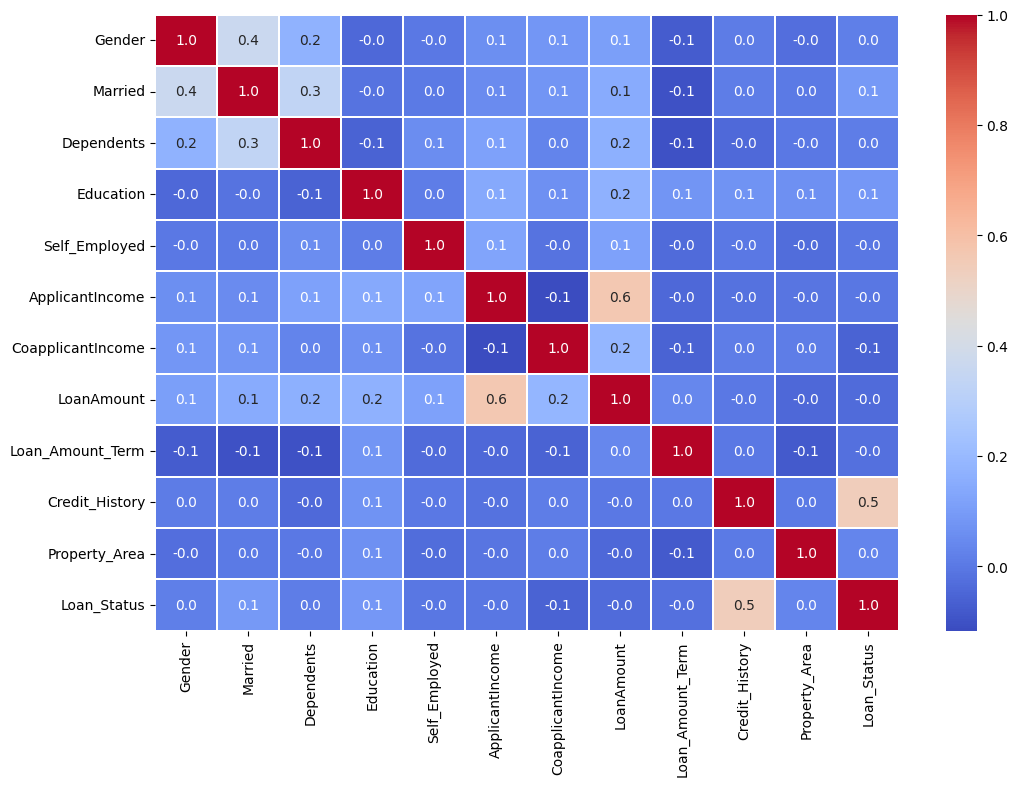

In [ ]:
#In this heatmap, we can clearly seen the relation between two variables
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

## **ML Models**

In [ ]:
x=df.iloc[:,1:12].values
y=df.iloc[:,12].values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    float64
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 62.5+ KB


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)  #Training dataset:75%   #Testing Dataset:25%

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def gen_metrics(model,ypred,x_train,x_test,y_train,y_test):
    cm = confusion_matrix(y_test,ypred)
    print('\nConfusion Matrix\n',cm)
    print('\nClassficaition Report\n',classification_report(y_test,ypred))

In [ ]:
# Method 1 : Naive Bayes
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()

model1.fit(x_train,y_train)
print(type(model1))
y_pred1 = model1.predict(x_test)

from sklearn.metrics import accuracy_score
model1_accuracy=accuracy_score(y_pred1,y_test)*100
print(model1_accuracy)
gen_metrics(model1,y_pred1,x_train,x_test,y_train,y_test)

<class 'sklearn.naive_bayes.MultinomialNB'>
47.4025974025974

Confusion Matrix
 [[22 21]
 [60 51]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.27      0.51      0.35        43
           1       0.71      0.46      0.56       111

    accuracy                           0.47       154
   macro avg       0.49      0.49      0.45       154
weighted avg       0.59      0.47      0.50       154



In [ ]:
# Method 2 : SVM

from sklearn.svm import SVC
model2 = SVC(kernel='linear')
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)

from sklearn.metrics import accuracy_score
model2_accuracy=accuracy_score(y_pred2,y_test)*100
print(model2_accuracy)
gen_metrics(model2,y_pred2,x_train,x_test,y_train,y_test)

83.11688311688312

Confusion Matrix
 [[ 20  23]
 [  3 108]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.87      0.47      0.61        43
           1       0.82      0.97      0.89       111

    accuracy                           0.83       154
   macro avg       0.85      0.72      0.75       154
weighted avg       0.84      0.83      0.81       154



In [ ]:
# Method 3 : Logistic Regression

from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train,y_train) #to train the machine / to prepare my model for predictions
y_pred3 = model3.predict(x_test)

from sklearn.metrics import accuracy_score
model3_accuracy=accuracy_score(y_pred3,y_test)*100
print(model3_accuracy)
gen_metrics(model3,y_pred3,x_train,x_test,y_train,y_test)

83.76623376623377

Confusion Matrix
 [[ 20  23]
 [  2 109]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.91      0.47      0.62        43
           1       0.83      0.98      0.90       111

    accuracy                           0.84       154
   macro avg       0.87      0.72      0.76       154
weighted avg       0.85      0.84      0.82       154



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Method 4 : KNN

from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=5)
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)

from sklearn.metrics import accuracy_score
model4_accuracy=accuracy_score(y_pred4,y_test)*100
print(model4_accuracy)
gen_metrics(model4,y_pred4,x_train,x_test,y_train,y_test)

61.68831168831169

Confusion Matrix
 [[10 33]
 [26 85]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.28      0.23      0.25        43
           1       0.72      0.77      0.74       111

    accuracy                           0.62       154
   macro avg       0.50      0.50      0.50       154
weighted avg       0.60      0.62      0.61       154



In [ ]:
#method 5 Decision Tree
from sklearn.tree import DecisionTreeClassifier
model5=DecisionTreeClassifier( criterion = "entropy", random_state = 0, max_depth = 4, min_samples_leaf = 2) #max_depth may change with features
model5.fit(x_train,y_train)
y_pred5=model5.predict(x_test)

from sklearn.metrics import accuracy_score
model5_accuracy=accuracy_score(y_test,y_pred5)*100
print(model5_accuracy)
gen_metrics(model5,y_pred5,x_train,x_test,y_train,y_test)

82.46753246753246

Confusion Matrix
 [[ 19  24]
 [  3 108]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.82      0.97      0.89       111

    accuracy                           0.82       154
   macro avg       0.84      0.71      0.74       154
weighted avg       0.83      0.82      0.80       154



In [ ]:
#Method 6 : Random Forest

from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(random_state=1)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)

from sklearn.metrics import accuracy_score
model6_accuracy=accuracy_score(y_test,y_pred6)*100
print(model6_accuracy)
gen_metrics(model6,y_pred6,x_train,x_test,y_train,y_test)

81.16883116883116

Confusion Matrix
 [[ 19  24]
 [  5 106]]

Classficaition Report
               precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.82      0.95      0.88       111

    accuracy                           0.81       154
   macro avg       0.80      0.70      0.72       154
weighted avg       0.81      0.81      0.79       154



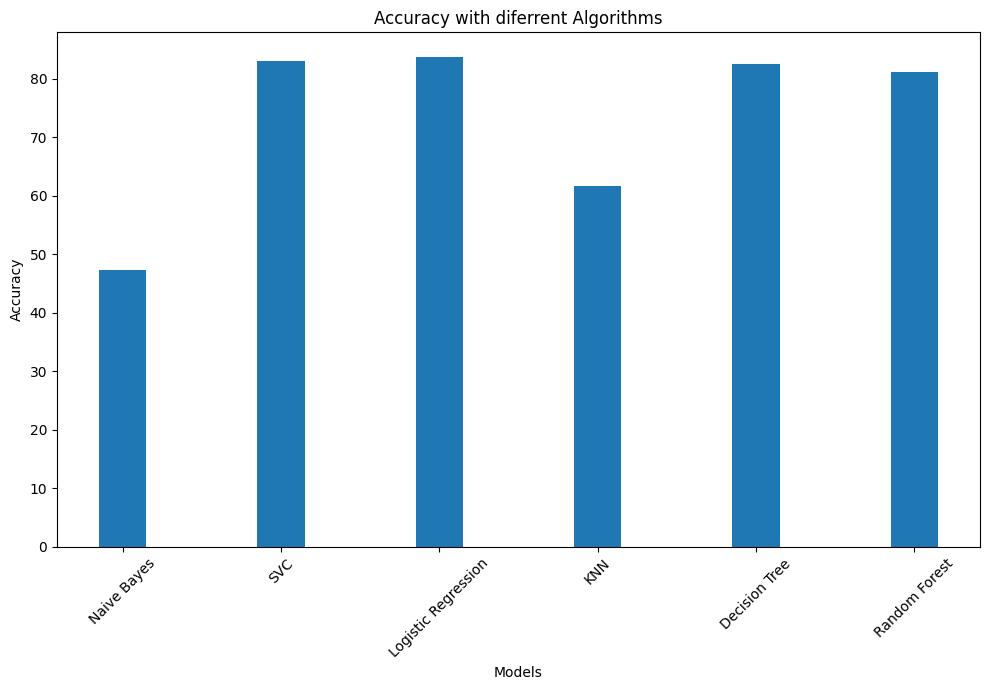

In [ ]:
models=[model1_accuracy, model2_accuracy, model3_accuracy, model4_accuracy, model5_accuracy , model6_accuracy]
names=["Naive Bayes", "SVC", "Logistic Regression", "KNN", "Decision Tree","Random Forest"]

x=np.arange(len(names))
width=0.3
fig,ax=plt.subplots(figsize=(10,7))
rects=ax.bar(x,models,width)
ax.set_ylabel('Accuracy')
ax.set_xlabel('Models')
ax.set_title('Accuracy with diferrent Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names,rotation=45)
fig.tight_layout()
plt.show()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,3,1
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,3,1
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,3,1
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,3,1


In [ ]:
test_X3 = np.array([1.0, 0.0,	0.0,	1,	0.0,	5849,	0.0,	146.412162,	360.0,	1.0,	3])
pred_y3 = model3.predict(test_X3.reshape(1, -1))
if pred_y3==1:
   ans="Yes"
else:
   ans="No"
print("Prediction = ", ans)

Prediction =  Yes
